Librerías

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Lectura de los datos

In [3]:
url_prueba = 'https://drive.google.com/uc?id=1fX6fIl08S8ywgbLnJvAyUxnt6OTkas4v'
url_training = 'https://drive.google.com/uc?id=1I_s6rL9wJeXEutSi7SEnL7vuRN5kFCKu'
signal = pd.read_csv(url_training,sep=';',index_col=0)
df = pd.DataFrame(signal)
df

,Real,Imaginario,Map
SNR,,,
-10,-0.321734,2.256881,13
-10,-3.721091,1.576841,1
-10,-1.257743,-0.210152,1
-10,-6.917534,4.011253,3
-10,0.842395,4.023504,14
...,...,...,...
20,-0.881438,-1.112599,5
20,0.997506,1.155871,15
20,-2.919098,-0.848539,1


# **Preprosesamiento**

In [4]:
x = df.iloc[:, :2]
y = df.iloc[:, 2]

In [5]:
valores_snr = df.index.unique()
print(valores_snr)

Int64Index([-10, -5, 0, 5, 10, 15, 20], dtype='int64', name='SNR')


In [6]:
escaladores = {
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer(),
    'QuantileTransformer': QuantileTransformer(),
    'PowerTransformer': PowerTransformer()
}

In [7]:
dropdown_escalador = widgets.Dropdown(options=list(escaladores.keys()), description='Escalador:')

def actualizar_grafica(escalador):
  scaler = escaladores[escalador]
  datos_normalizados = scaler.fit_transform(x)

  df_normalizado = pd.DataFrame(datos_normalizados, index=df.index, columns=['Real', 'Imaginario'])
  df_normalizado['Map'] = df['Map']
  #print(df_normalizado)

  fig, axs = plt.subplots(len(valores_snr), 1, figsize=(6, len(valores_snr) * 4), sharex=True)
  for i, snr in enumerate(valores_snr):
      datos_snr = df_normalizado.loc[snr]
      ax = axs[i]
      
      ax.scatter(datos_snr['Real'], datos_snr['Imaginario'], c=datos_snr['Map'],  cmap='viridis')
      ax.set_title('SNR = {}'.format(snr))
      ax.set_xlabel('Real')
      ax.set_ylabel('Imaginario')
      ax.set

  # Ajustar los espacios entre subgráficas
  plt.tight_layout()

  # Mostrar la gráfica
  plt.show()

widgets.interactive(actualizar_grafica, escalador=dropdown_escalador)

interactive(children=(Dropdown(description='Escalador:', options=('MinMaxScaler', 'MaxAbsScaler', 'StandardSca…

In [8]:
x = df.iloc[:, :2]
encoder = OneHotEncoder(sparse_output=False)
y_new = encoder.fit_transform(y.to_numpy().reshape(-1, 1))

# **Entrenamiento**

In [9]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y_new, test_size=0.20)

In [10]:
# Build the model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='relu', name='Layer1'))
model.add(Dense(16, activation='sigmoid', name='output'))
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Dense)              (None, 4)                 12        
                                                                 
 output (Dense)              (None, 16)                80        
                                                                 
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
reporte = model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=10)

Epoch 1/10
2240/2240 - 10s - loss: 2.4516 - accuracy: 0.2115 - 10s/epoch - 4ms/step
Epoch 2/10
2240/2240 - 5s - loss: 2.0145 - accuracy: 0.4246 - 5s/epoch - 2ms/step
Epoch 3/10
2240/2240 - 4s - loss: 1.8926 - accuracy: 0.5116 - 4s/epoch - 2ms/step
Epoch 4/10
2240/2240 - 4s - loss: 1.8317 - accuracy: 0.5604 - 4s/epoch - 2ms/step
Epoch 5/10
2240/2240 - 5s - loss: 1.7927 - accuracy: 0.5977 - 5s/epoch - 2ms/step
Epoch 6/10
2240/2240 - 4s - loss: 1.7671 - accuracy: 0.6221 - 4s/epoch - 2ms/step
Epoch 7/10
2240/2240 - 5s - loss: 1.7494 - accuracy: 0.6323 - 5s/epoch - 2ms/step
Epoch 8/10
2240/2240 - 5s - loss: 1.7371 - accuracy: 0.6341 - 5s/epoch - 2ms/step
Epoch 9/10
2240/2240 - 4s - loss: 1.7266 - accuracy: 0.6340 - 4s/epoch - 2ms/step
Epoch 10/10
2240/2240 - 5s - loss: 1.7183 - accuracy: 0.6377 - 5s/epoch - 2ms/step


In [12]:
results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

88/88 [==============================] - 0s 2ms/step - loss: 1.7414 - accuracy: 0.6554
Final test set loss: 1.741389
Final test set accuracy: 0.655357


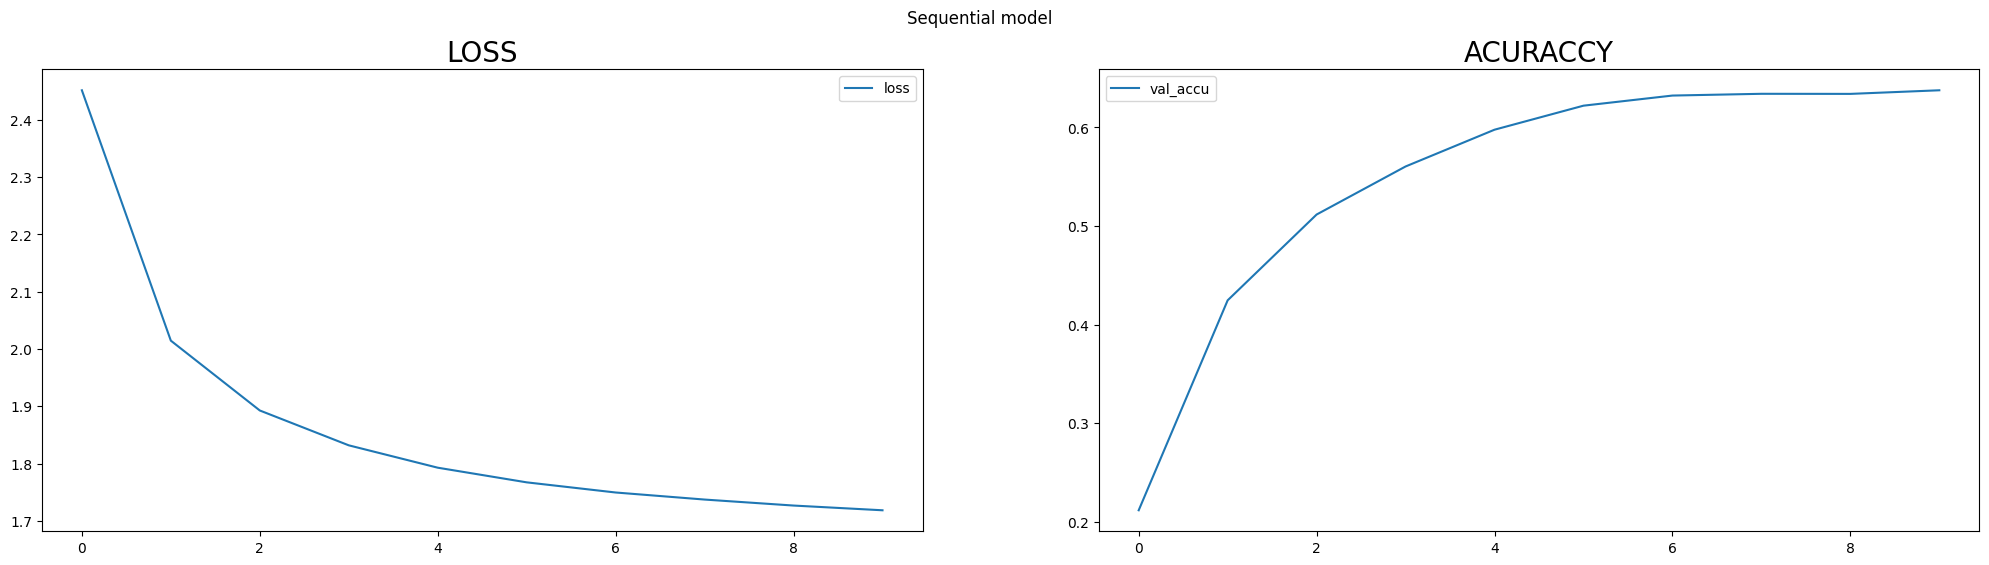

In [13]:
val_loss = reporte.history['loss']
val_accu = reporte.history['accuracy']
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,6))
fig.suptitle('Sequential model')
ax1.plot(val_loss,label='loss')
ax1.set_title('LOSS',fontsize=20)
ax1.legend()
ax2.plot(val_accu,label='val_accu')
ax2.set_title('ACURACCY',fontsize=20)
ax2.legend()

88/88 [==============================] - 0s 1ms/step


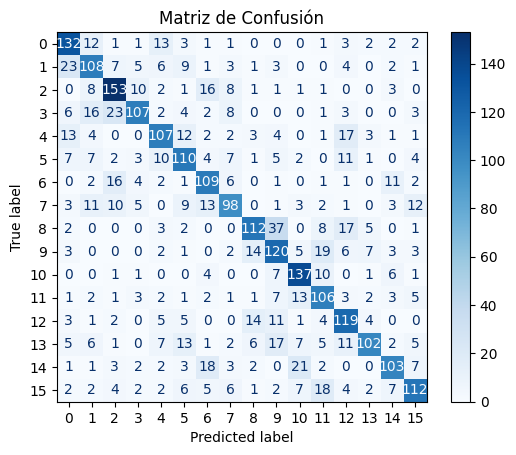

In [16]:
# Obtener las predicciones del modelo
pred_y = model.predict(test_x)
# Convertir las predicciones en etiquetas discretas
pred_y_discreto = np.argmax(pred_y, axis=1)

# Obtener la matriz de confusión
cm = confusion_matrix(np.argmax(test_y, axis=1), pred_y_discreto)

# Visualizar la matriz de confusión
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()